In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
data_path = 'data/SVD-Visualization/ovarian_cancer_data.csv'
label_path = 'data/SVD-Visualization/ovarian_cancer_label.csv'

In [3]:
data = np.loadtxt(data_path, delimiter=',')
with open(label_path, 'r') as f:
    label = f.read().split("\n")

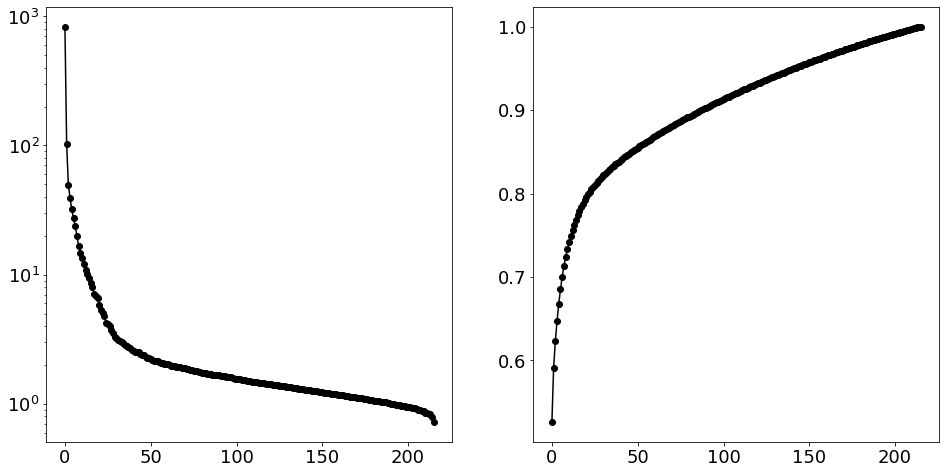

Number of patients: 216
Number of genetic identifiers: 4000


In [4]:
u, sigma, vT = np.linalg.svd(data, full_matrices=False)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(sigma, '-o', color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(sigma) / np.sum(sigma), '-o', color='k')

plt.show()

print(f"Number of patients: {data.shape[0]}")
print(f"Number of genetic identifiers: {data.shape[1]}")

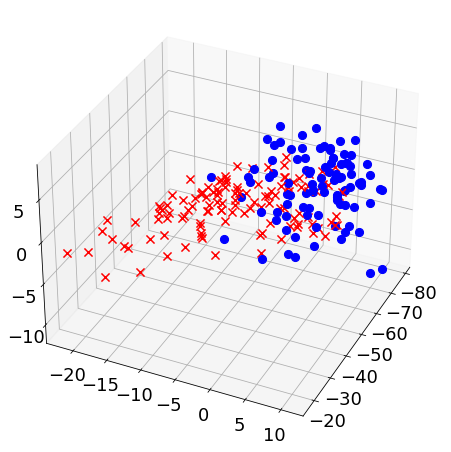

In [5]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

marker_size = 66

for j in range(data.shape[0]):
    x = vT[0, :] @ data[j, :].T
    y = vT[1, :] @ data[j, :].T
    z = vT[2, :] @ data[j, :].T

    if label[j] == 'Cancer':
        ax.scatter(x, y, z, marker='x', color='r', s=marker_size)
    else:
        ax.scatter(x, y, z, marker='o', color='b', s=marker_size)

viewing_angle = (33, 25)
ax.view_init(*viewing_angle)
plt.show()